In [1]:


import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.layers import Normalization, StringLookup, IntegerLookup, CategoryEncoding
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
housing = pd.read_csv('cal_housing_clean.csv')

In [3]:
housing.head()

housingMedianAge  totalRooms  totalBedrooms  population  households  \
0              41.0       880.0          129.0       322.0       126.0   
1              21.0      7099.0         1106.0      2401.0      1138.0   
2              52.0      1467.0          190.0       496.0       177.0   
3              52.0      1274.0          235.0       558.0       219.0   
4              52.0      1627.0          280.0       565.0       259.0   

   medianIncome  medianHouseValue  
0        8.3252          452600.0  
1        8.3014          358500.0  
2        7.2574          352100.0  
3        5.6431          341300.0  
4        3.8462          342200.0

In [4]:
housing.describe().transpose()

count           mean            std         min  \
housingMedianAge  20640.0      28.639486      12.585558      1.0000   
totalRooms        20640.0    2635.763081    2181.615252      2.0000   
totalBedrooms     20640.0     537.898014     421.247906      1.0000   
population        20640.0    1425.476744    1132.462122      3.0000   
households        20640.0     499.539680     382.329753      1.0000   
medianIncome      20640.0       3.870671       1.899822      0.4999   
medianHouseValue  20640.0  206855.816909  115395.615874  14999.0000   

                          25%          50%           75%          max  
housingMedianAge      18.0000      29.0000      37.00000      52.0000  
totalRooms          1447.7500    2127.0000    3148.00000   39320.0000  
totalBedrooms        295.0000     435.0000     647.00000    6445.0000  
population           787.0000    1166.0000    1725.00000   35682.0000  
households           280.0000     409.0000     605.00000    6082.0000  
medianIncome           2.5634       3.5348       4.74325      15.0001  
medianHouseValue  119600.0000  179700.0000  264725.00000  500001.0000

In [5]:
x_data = housing.drop(['medianHouseValue'],axis=1)
y_val = housing['medianHouseValue']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [7]:
# Normalize continuous variables using StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Sequential model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {mse:.4f}')

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
Test Mean Squared Error: 6293232989.9707


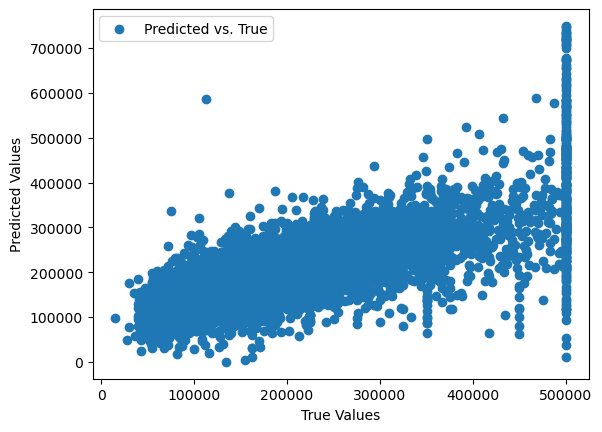

In [8]:
# Plot the results
plt.scatter(y_test, y_pred, label='Predicted vs. True')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()